In [1]:
# import python packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# Display setting for pandas and numpys
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(formatter={'float': '{:.2f}'.format})

In [2]:
df= pd.read_csv('RiyadhVillasAqar.csv')

<ipython-input-2-1f1dee4ce32a>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('RiyadhVillasAqar.csv')


In [3]:
df.shape

(46826, 26)

In [4]:
df.head()

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4.0,5+,20.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,300,0,0.00,0.00,0.00,0.00,0.00,عكاظ,جنوب الرياض,1050000.00,3500.00
1,1,غربية,4,3.0,5+,20.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,540,2.0,1.00,1.00,0.00,0.00,0.00,المهدية,غرب الرياض,3000000.00,5555.56
2,2,جنوبية شرقية,7,2.0,5+,15.00,1.00,31.00,1.00,0.00,1.00,1.00,1.00,1.00,0.00,875,0,1.00,0.00,0.00,0.00,0.00,الشفا,جنوب الرياض,2000000.00,2285.71
3,3,غربية,7,3.0,5+,15.00,1.00,3.00,0.00,1.00,1.00,1.00,0.00,1.00,1.00,200,0,1.00,0.00,1.00,0.00,0.00,ظهرة لبن,غرب الرياض,894000.00,4470.00
4,4,شمالية,4,2.0,4,25.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,400,3.0,1.00,1.00,1.00,0.00,0.00,قرطبة,شرق الرياض,3500000.00,8750.00


In [5]:
df.tail()

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
46821,51840,جنوبية,5,2,5+,20.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,385,1.00,1.00,1.00,0.00,0.00,0.00,المونسية,شرق الرياض,2250000.00,5844.16
46822,51841,غربية,7,2,5+,12.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,500,0.00,1.00,0.00,0.00,0.00,0.00,ظهرة البديعة,غرب الرياض,1050000.00,2100.00
46823,51842,غربية,5,3,5+,20.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,200,0.00,1.00,0.00,0.00,0.00,0.00,طويق,غرب الرياض,1000000.00,5000.00
46824,51843,جنوبية غربية,1,NaN,1,15.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,405,2.00,0.00,0.00,0.00,0.00,0.00,النهضة,شرق الرياض,2300000.00,5679.01
46825,51844,شمالية,6,2,5+,15.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,750,2.00,1.00,0.00,0.00,0.00,0.00,المونسية,شرق الرياض,4100000.00,5466.67


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46826 entries, 0 to 46825
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     46826 non-null  int64  
 1   front          46826 non-null  object 
 2   rooms          46826 non-null  int64  
 3   lounges        45708 non-null  object 
 4   bathrooms      46826 non-null  object 
 5   streetWidth    46636 non-null  float64
 6   stairs         46826 non-null  float64
 7   propertyAge    46826 non-null  float64
 8   driverRoom     46826 non-null  float64
 9   tent           46826 non-null  float64
 10  patio          46826 non-null  float64
 11  kitchen        46826 non-null  float64
 12  outdoorRoom    46826 non-null  float64
 13  garage         46826 non-null  float64
 14  duplex         46826 non-null  float64
 15  space          46826 non-null  int64  
 16  apartments     46826 non-null  object 
 17  maidRoom       46826 non-null  float64
 18  elevat

In [7]:
df.isna().sum()

,0
Unnamed: 0,0
front,0
rooms,0
lounges,1118
bathrooms,0
streetWidth,190
stairs,0
propertyAge,0
driverRoom,0
tent,0


In [8]:
df.duplicated().sum()

0

In [9]:
# Replace '30+' with '30', and convert column to int
df['apartments'] = df['apartments'].replace('30+', '30')


# Convert the apartment column to float first, then to int
df['apartments'] = pd.to_numeric(df['apartments']).fillna(0).astype(int)


In [10]:
# Replace '5+' with '5', and convert column to int
df['bathrooms'] = df['bathrooms'].replace('5+', '5')

# Convert the bathrooms column to integer
df['bathrooms'] = df['bathrooms'].astype(int)

In [11]:
# Remove '+' sign and convert column to int
df['lounges'] = df['lounges'].str.replace('+', '', regex=False).astype(float)

In [12]:
#std compute the different of column from mean , being std > Num or std < Num. الانحراف المعياري يستخدم لقياس تشتت البيانات
df.describe()

,Unnamed: 0,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,price,square price
count,46826.00,46826.00,45708.00,46826.00,46636.00,46826.00,46826.00,46826.00,46826.00,46826.00,46826.00,46826.00,46826.00,46826.00,46826.00,46826.00,46826.00,46826.00,46826.00,46826.00,46826.00,46824.00,46824.00
mean,25915.13,4.69,2.38,4.53,18.16,0.68,2.45,0.36,0.47,0.77,0.98,0.65,0.91,0.30,380.02,0.72,0.77,0.24,0.08,0.12,0.04,2347636.41,6088.06
std,14993.82,1.10,1.00,0.82,4.17,0.46,6.50,0.48,0.50,0.42,0.14,0.48,0.29,0.46,281.43,1.06,0.42,0.42,0.27,0.32,0.19,2782052.77,4515.85
min,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,1080.00,3.43
25%,12925.25,4.00,2.00,4.00,15.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,270.00,0.00,1.00,0.00,0.00,0.00,0.00,1180000.00,3866.67
50%,25836.50,5.00,2.00,5.00,20.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,312.00,0.00,1.00,0.00,0.00,0.00,0.00,1600000.00,5000.00
75%,38917.75,5.00,3.00,5.00,20.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,400.00,1.00,1.00,0.00,0.00,0.00,0.00,2600000.00,7600.00
max,51844.00,7.00,7.00,5.00,100.00,1.00,35.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,10000.00,30.00,1.00,1.00,1.00,1.00,1.00,100000000.00,136144.58


In [13]:
# check the correlation
numeric_df = df.select_dtypes(include='number')


corr= numeric_df.corr()
corr

,Unnamed: 0,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,kitchen,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,price,square price
Unnamed: 0,1.00,0.02,-0.01,-0.00,-0.01,0.02,0.01,0.01,-0.00,-0.00,0.01,-0.01,-0.00,-0.03,0.00,0.01,-0.01,0.01,0.00,0.00,-0.00,0.01,0.01
rooms,0.02,1.00,0.15,0.34,0.03,0.13,0.06,-0.01,0.15,0.16,-0.03,0.05,0.06,-0.01,0.12,0.02,0.07,0.02,0.02,0.04,0.03,0.06,-0.04
lounges,-0.01,0.15,1.00,0.22,0.06,0.08,-0.01,0.12,0.05,0.07,0.04,0.08,0.05,0.01,0.12,0.01,0.18,0.11,0.06,0.12,0.09,0.14,0.06
bathrooms,-0.00,0.34,0.22,1.00,0.07,0.14,-0.10,-0.08,0.20,0.25,0.04,0.14,0.24,0.06,0.01,-0.04,0.21,0.02,0.03,0.04,0.03,0.00,-0.04
streetWidth,-0.01,0.03,0.06,0.07,1.00,0.01,-0.09,-0.08,0.11,0.08,0.02,0.05,0.05,0.08,0.08,-0.03,0.01,-0.02,0.04,0.03,0.04,0.06,-0.04
stairs,0.02,0.13,0.08,0.14,0.01,1.00,-0.16,0.10,0.01,0.09,0.03,0.12,0.13,-0.09,-0.02,-0.02,0.23,0.19,-0.05,0.09,-0.02,0.08,0.13
propertyAge,0.01,0.06,-0.01,-0.10,-0.09,-0.16,1.00,0.21,-0.09,-0.03,-0.05,-0.00,-0.10,-0.18,0.31,0.08,-0.05,-0.17,0.09,-0.01,0.06,0.08,-0.10
driverRoom,0.01,-0.01,0.12,-0.08,-0.08,0.10,0.21,1.00,-0.28,-0.02,0.04,0.15,0.11,-0.26,0.26,0.02,0.31,0.36,0.09,0.32,0.11,0.37,0.34
tent,-0.00,0.15,0.05,0.20,0.11,0.01,-0.09,-0.28,1.00,0.33,0.07,0.14,0.22,0.17,-0.04,0.04,0.05,-0.23,0.16,-0.10,0.03,-0.17,-0.26
patio,-0.00,0.16,0.07,0.25,0.08,0.09,-0.03,-0.02,0.33,1.00,0.07,0.31,0.39,0.07,0.03,-0.01,0.19,-0.02,0.10,0.05,0.05,-0.01,-0.08


In [14]:
# Drop columns not need
df = df.drop(columns=['Unnamed: 0', 'tent', 'patio', 'tent', 'kitchen'])

<Axes: xlabel='space', ylabel='price'>

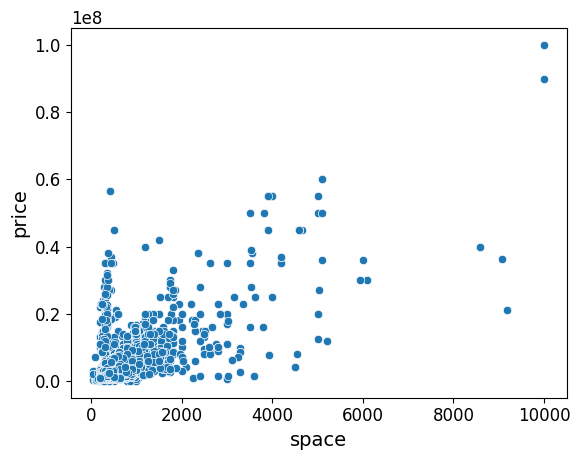

In [15]:
sns.scatterplot(x= df.space , y= df.price)

<Axes: xlabel='propertyAge', ylabel='price'>

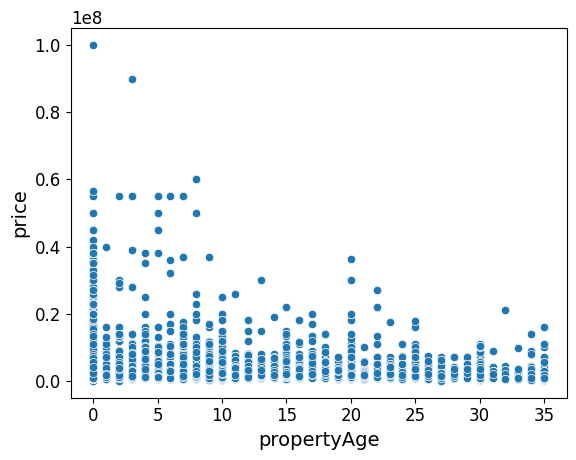

In [16]:
sns.scatterplot(x= df.propertyAge , y= df.price)

In [17]:
#filtering
df.query("location == 'جنوب الرياض'")

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,شرقية,5,4.00,5,20.00,1.00,0.00,1.00,1.00,1.00,1.00,300,0,0.00,0.00,0.00,0.00,0.00,عكاظ,جنوب الرياض,1050000.00,3500.00
2,جنوبية شرقية,7,2.00,5,15.00,1.00,31.00,1.00,1.00,1.00,0.00,875,0,1.00,0.00,0.00,0.00,0.00,الشفا,جنوب الرياض,2000000.00,2285.71
7,شمالية,7,3.00,5,25.00,1.00,6.00,0.00,1.00,1.00,1.00,300,0,1.00,0.00,0.00,0.00,0.00,عكاظ,جنوب الرياض,1100000.00,3666.67
9,شمالية شرقية,5,5.00,5,22.00,1.00,0.00,0.00,1.00,1.00,0.00,360,0,1.00,0.00,0.00,0.00,0.00,عكاظ,جنوب الرياض,1200000.00,3333.33
11,جنوبية,5,4.00,5,21.00,1.00,0.00,0.00,1.00,1.00,1.00,300,0,0.00,0.00,0.00,0.00,0.00,بدر,جنوب الرياض,1050000.00,3500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46790,شرقية,5,2.00,5,18.00,1.00,0.00,0.00,0.00,0.00,1.00,300,0,0.00,0.00,0.00,0.00,0.00,عكاظ,جنوب الرياض,1070000.00,3566.67
46791,شرقية,5,5.00,5,25.00,0.00,0.00,0.00,1.00,1.00,0.00,360,0,1.00,0.00,0.00,0.00,0.00,عكاظ,جنوب الرياض,730000.00,2027.78
46805,شرقية,7,3.00,5,17.00,1.00,0.00,0.00,1.00,1.00,0.00,360,1,0.00,0.00,0.00,0.00,0.00,بدر,جنوب الرياض,1170000.00,3250.00
46808,شرقية,5,2.00,5,20.00,0.00,0.00,0.00,1.00,1.00,1.00,260,0,1.00,0.00,0.00,0.00,0.00,طيبة,جنوب الرياض,855000.00,3288.46


In [18]:
df['location'].value_counts()

,count
location,
غرب الرياض,13548
شرق الرياض,12844
شمال الرياض,11254
جنوب الرياض,8960
وسط الرياض,220


In [19]:
df['front'].value_counts()

,count
front,
شمالية,12160
شرقية,10613
جنوبية,10216
غربية,6985
شمالية شرقية,1982
جنوبية غربية,1599
جنوبية شرقية,1503
شمالية غربية,1409
ثلاث شوارع,315


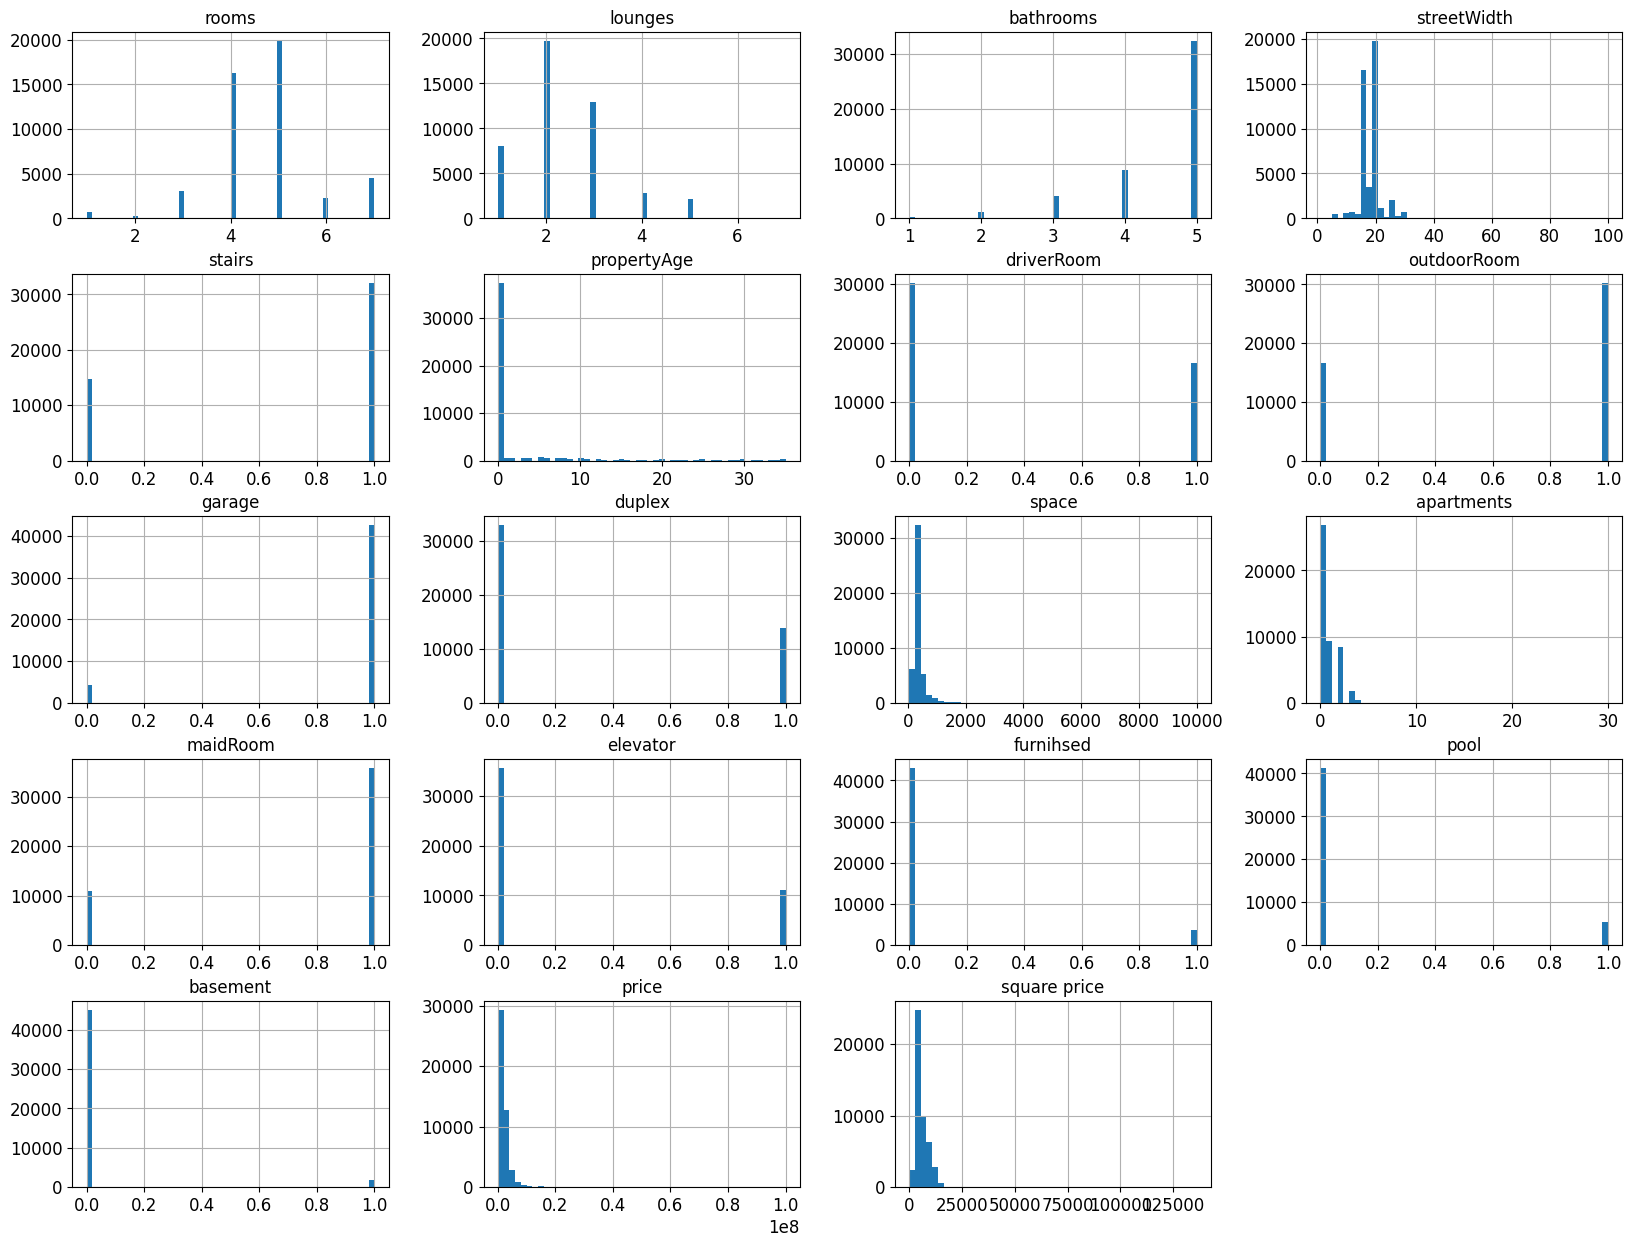

In [20]:
#loc and iloc
df.hist(bins=50, figsize=(20,15));

<Figure size 1200x800 with 0 Axes>

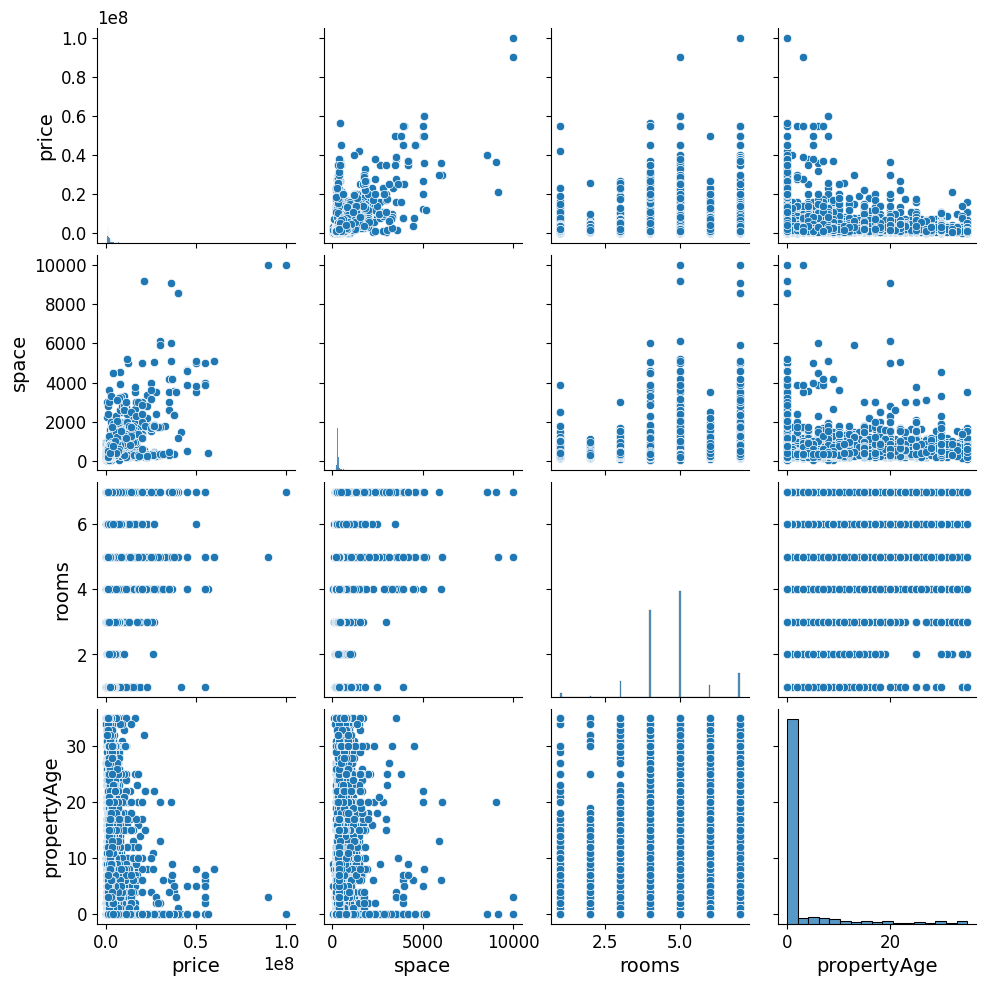

In [21]:
plt.figure(figsize=(12, 8))
attributes = ["price", "space", "rooms",
              "propertyAge"]
sns.pairplot(df[attributes]);

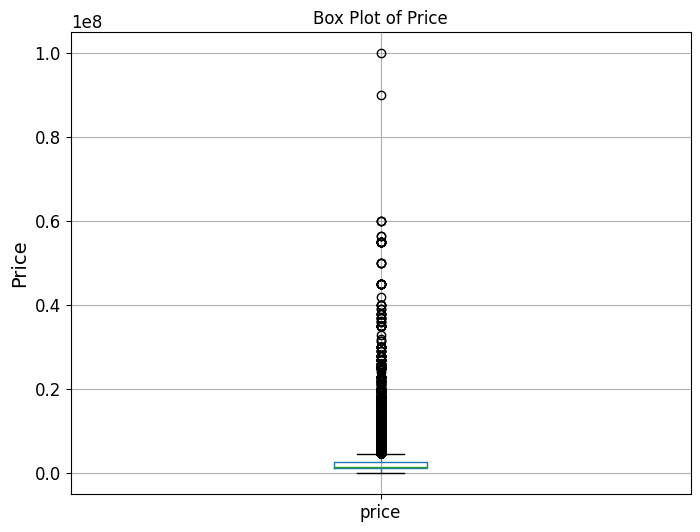

In [22]:
plt.figure(figsize=(8, 6))
df.boxplot(column='price')
plt.title('Box Plot of Price')
plt.ylabel('Price')
plt.show()

In [23]:
df[df['price']> 50000000]

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,outdoorRoom,garage,duplex,space,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
2057,جنوبية,4,2.00,4,15.00,0.00,0.00,1.00,0.00,1.00,0.00,415,0,1.00,0.00,0.00,0.00,0.00,الملقا,شمال الرياض,56500000.00,136144.58
2466,ثلاث شوارع,5,5.00,5,20.00,0.00,8.00,1.00,1.00,1.00,0.00,5100,0,1.00,0.00,0.00,0.00,0.00,حطين,شمال الرياض,60000000.00,11764.71
5006,ثلاث شوارع,7,1.00,5,20.00,1.00,7.00,1.00,1.00,1.00,0.00,4000,0,1.00,1.00,0.00,1.00,0.00,النخيل,شمال الرياض,55000000.00,13750.00
6218,ثلاث شوارع,4,4.00,4,20.00,0.00,6.00,1.00,1.00,1.00,0.00,3900,0,1.00,1.00,1.00,1.00,1.00,حطين,شمال الرياض,55000000.00,14102.56
6579,ثلاث شوارع,5,5.00,5,20.00,1.00,3.00,1.00,1.00,1.00,0.00,3900,1,1.00,1.00,0.00,1.00,1.00,حطين,شمال الرياض,55000000.00,14102.56
6706,أربع شوارع,7,5.00,5,NaN,1.00,5.00,1.00,1.00,1.00,0.00,4000,0,1.00,1.00,1.00,1.00,0.00,حطين,شمال الرياض,55000000.00,13750.00
9321,ثلاث شوارع,5,5.00,5,20.00,1.00,3.00,1.00,1.00,1.00,0.00,3900,1,1.00,1.00,0.00,1.00,1.00,حطين,شمال الرياض,55000000.00,14102.56
9618,ثلاث شوارع,5,5.00,5,20.00,0.00,8.00,1.00,1.00,1.00,0.00,5100,0,1.00,0.00,0.00,0.00,0.00,حطين,شمال الرياض,60000000.00,11764.71
11726,ثلاث شوارع,7,1.00,5,20.00,1.00,7.00,1.00,1.00,1.00,0.00,4000,0,1.00,1.00,0.00,1.00,0.00,النخيل,شمال الرياض,55000000.00,13750.00
12313,أربع شوارع,7,5.00,5,NaN,1.00,5.00,1.00,1.00,1.00,0.00,4000,0,1.00,1.00,1.00,1.00,0.00,حطين,شمال الرياض,55000000.00,13750.00


In [24]:
# maximum price
df['price'] = df['price'].clip(upper=50000000)

In [25]:
#fill null in df

# Group by 'Location' and calculate the median price for each location
median_prices = df.groupby('location')['price'].transform('median')

# Fill null values in 'Price' with the corresponding median price of their location
df['price'] = df['price'].fillna(median_prices)


In [26]:
# Find the (mode) in 'lounges'
most_frequent_value = df['lounges'].mode()[0]

# Fill null values in 'lounges' with the most frequent value
df['lounges'] = df['lounges'].fillna(most_frequent_value)


In [27]:
# function to fill nulls with the most frequent value
def fill_most_frequent(group):
    most_frequent_value = group.mode()[0]
    return group.fillna(most_frequent_value)

# Apply the function to the 'Street Width' column, grouped by 'Location'
df['streetWidth'] = df.groupby('location')['streetWidth'].transform(fill_most_frequent)


In [28]:
df['square price']= df['square price'].fillna(0)

In [29]:
target_median = df.groupby('neighbourhood')['price'].median()
df['neighbourhood_encoded'] = df['neighbourhood'].map(target_median)

In [30]:
# encoding the neighbourhood with median price of that neighbourhood
cols= ['neighbourhood', 'neighbourhood_encoded']
neighbourhood_dic= df[cols].copy()

In [31]:
# Drop column
df = df.drop(columns=['neighbourhood'])

In [32]:
# to make this notebook's output identical at every run
np.random.seed(9)

In [33]:
# Separate features (X) and target (y)
X = df.drop(columns=['price'])  # All features except the target
y = df['price']  # Target variable

In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=9)


In [35]:
# Resulting datasets
print(f"Training dataset has {X_train.shape[0]} records, and {X_train.shape[1]} columns in Features. The target has {len(y_train)} records.")
print(f"Testing dataset has {X_test.shape[0]} records, and {X_test.shape[1]} columns, in Features. The target has {len(y_test)} records.")


Training dataset has 42143 records, and 21 columns in Features. The target has 42143 records.
Testing dataset has 4683 records, and 21 columns, in Features. The target has 4683 records.


# categorical data label encoding

In [36]:
X_train_encoded = pd.get_dummies(X_train, columns=['front','location'])


In [37]:
X_test_encoded = pd.get_dummies(X_test, columns=['front','location'])


In [38]:
# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


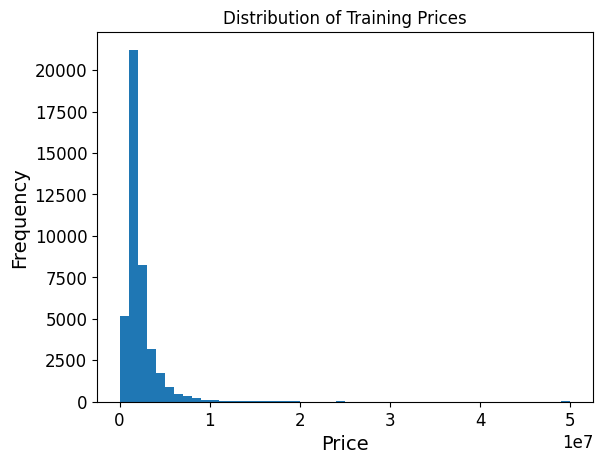

In [39]:
plt.hist(y_train, bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Training Prices')
plt.show()

In [40]:
model = Ridge(alpha=1.0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [41]:
rmse= np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error with Ridge Regression:", rmse)

Root Mean Squared Error with Ridge Regression: 908852.7248755015


In [42]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


Mean Absolute Error: 340618.92846225615
Mean Squared Error: 826013275513.6239
R² Score: 0.8597986325247379


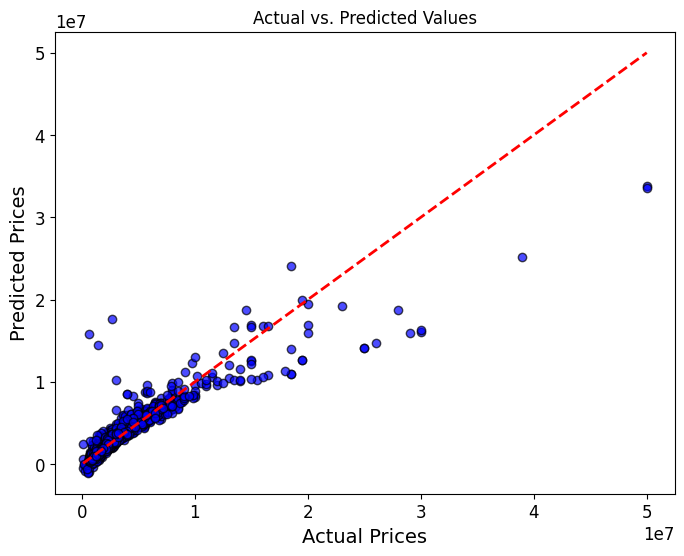

In [43]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", edgecolor="k", alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", lw=2)

# Add titles and labels
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

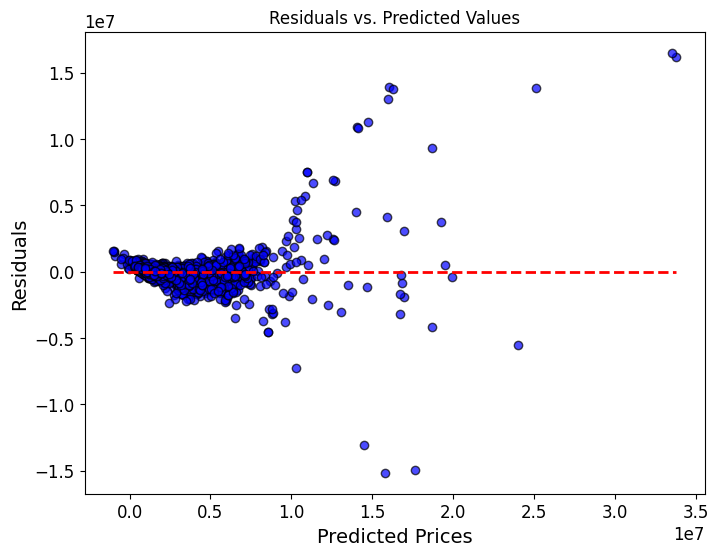

In [45]:
# Calculate residuals, the difference between actual and predicted values
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color="blue", edgecolor="k", alpha=0.7)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color="red", linestyle="--", lw=2)

# Add titles and labels
plt.title("Residuals vs. Predicted Values")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()
